# BIBLIOTECAS

###PRIMER ENTREGA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

###ENTREGA FINAL

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import shap

# BASE DE DATOS


In [3]:
df = pd.read_excel('/content/VINOS-ARGENTINA-ITALIA.xlsx')

In [4]:
df.head()

,Column1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,2,Italy,"Here's a bright, informal red that opens with ...",Belsito,87.0,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
2,3,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
3,4,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87.0,30.0,Salta,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
4,5,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87.0,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino


In [5]:
df.dtypes

,0
Column1,int64
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,float64
taster_name,object


# LIMPIEZA DE DATOS

In [6]:
# 1. Revisar información general del DataFrame
df.info()

# 2. Resumen estadístico para columnas numéricas
df.describe()

# 3. Verificar valores nulos en el dataset
null_values = df.isnull().sum()

null_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Column1                23047 non-null  int64  
 1   country                23047 non-null  object 
 2   description            23047 non-null  object 
 3   designation            16581 non-null  object 
 4   points                 23046 non-null  float64
 5   price                  20408 non-null  float64
 6   province               23046 non-null  object 
 7   region_1               22967 non-null  object 
 8   region_2               0 non-null      float64
 9   taster_name            14706 non-null  object 
 10  taster_twitter_handle  14706 non-null  object 
 11  title                  23046 non-null  object 
 12  variety                23046 non-null  object 
 13  winery                 23046 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.5+

,0
Column1,0
country,0
description,0
designation,6466
points,1
price,2639
province,1
region_1,80
region_2,23047
taster_name,8341


In [7]:
columnas_a_eliminar = ['Column1', 'description', 'region_1', 'region_2', 'taster_twitter_handle',]
df = df.drop(columnas_a_eliminar, axis=1)

In [8]:
df.head()

,country,designation,points,price,province,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Italy,Belsito,87.0,16.0,Sicily & Sardinia,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
2,Italy,Rosso,87.0,NaN,Sicily & Sardinia,Kerin O’Keefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
3,Argentina,Felix,87.0,30.0,Salta,Michael Schachner,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
4,Argentina,Winemaker Selection,87.0,13.0,Mendoza Province,Michael Schachner,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino


In [9]:
# 1. Rellenar valores nulos en 'price' y 'points' con la mediana (representa un valor típico)
df['price'] = df['price'].fillna(df['price'].median())
df['points'] = df['points'].fillna(df['points'].median())

In [10]:
# 2. Rellenar valores faltantes en 'designation', 'province','variety', 'winery' con 'Desconocido'
columns_to_fill = ['designation', 'province', 'variety', 'winery']
df_cleaned = df.copy()
df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna('Desconocido')

In [11]:
# Verificar si hay valores nulos restantes
remaining_nulls = df_cleaned.isnull().sum()

In [12]:
remaining_nulls

,0
country,0
designation,0
points,0
price,0
province,0
taster_name,8341
title,1
variety,0
winery,0


# ANALISIS EXPLORATORIO DE DATOS

In [13]:
# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")
palette = ["#04dc61", "#50d98e", "#0c9c4c", "#4cacac", "#91c1a8", "#363d4a"]

##  Pregunta 1: Variedades de uva más populares por país

In [14]:
top_varieties = (
    df_cleaned.groupby(['country', 'variety'])
    .size()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
)

In [15]:
top_varieties_arg = top_varieties[top_varieties['country'] == 'Argentina'].head(5)
top_varieties_ita = top_varieties[top_varieties['country'] == 'Italy'].head(5)

<ipython-input-16-50261f23067d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-16-50261f23067d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


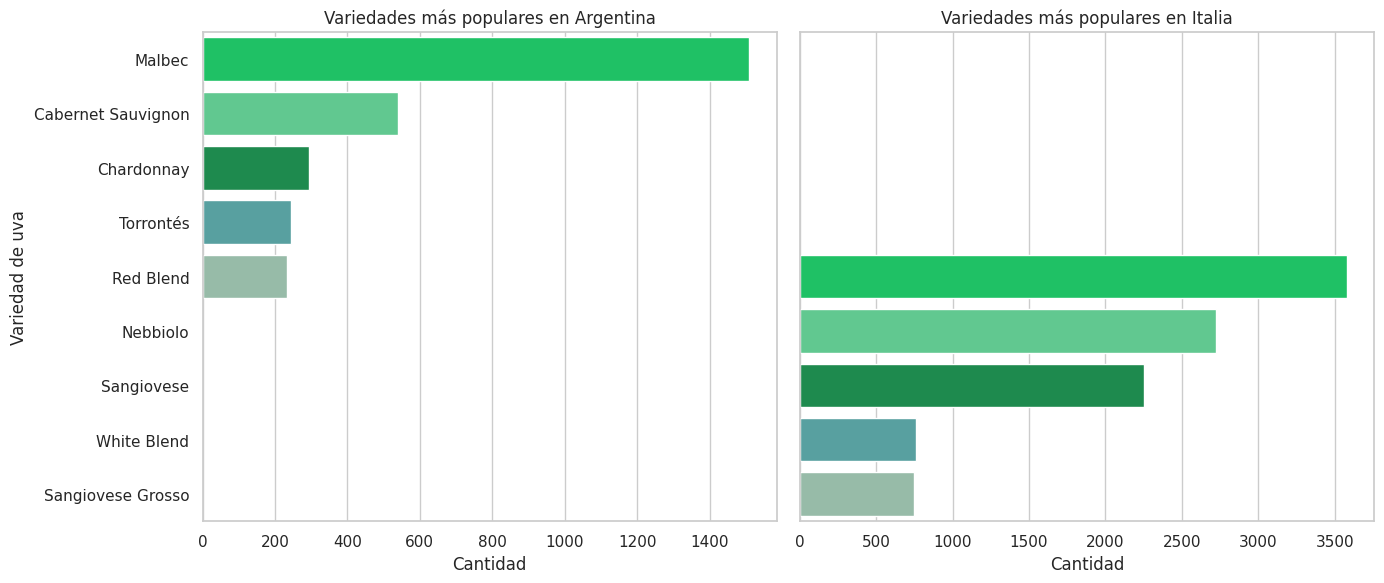

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(
    data=top_varieties_arg,
    x='count', y='variety',
    palette=palette[:5],
    ax=ax[0]
)
ax[0].set_title('Variedades más populares en Argentina')
ax[0].set_xlabel('Cantidad')
ax[0].set_ylabel('Variedad de uva')

sns.barplot(
    data=top_varieties_ita,
    x='count', y='variety',
    palette=palette[:5],
    ax=ax[1]
)
ax[1].set_title('Variedades más populares en Italia')
ax[1].set_xlabel('Cantidad')

plt.tight_layout()
plt.show()

In [17]:
# Guardar resultados de variedades más populares
top_varieties_arg, top_varieties_ita

(      country             variety  count
 24  Argentina              Malbec   1510
 8   Argentina  Cabernet Sauvignon    540
 17  Argentina          Chardonnay    295
 62  Argentina           Torrontés    245
 44  Argentina           Red Blend    234,
     country            variety  count
 203   Italy          Red Blend   3577
 171   Italy           Nebbiolo   2724
 213   Italy         Sangiovese   2252
 254   Italy        White Blend    759
 214   Italy  Sangiovese Grosso    749)

## Pregunta 2: ¿Qué provincias producen los vinos mejor puntuados?

In [18]:
# Agrupar por país y provincia, y calcular la puntuación promedio
province_scores = (
    df_cleaned.groupby(['country', 'province'])['points']
    .mean()
    .reset_index()
    .sort_values(['country', 'points'], ascending=[True, False])
)

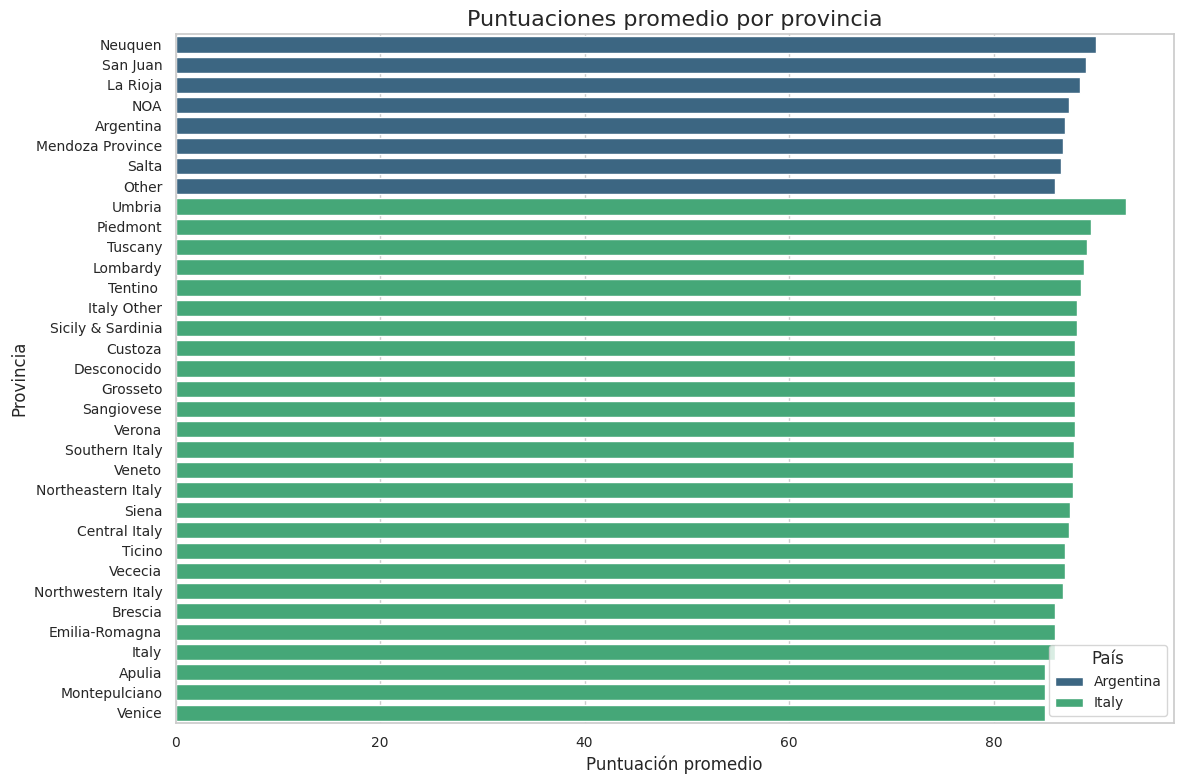

In [19]:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño: ancho=12 pulgadas, alto=8 pulgadas
sns.barplot(data=province_scores, x='points', y='province', hue='country', palette="viridis")
plt.title('Puntuaciones promedio por provincia', fontsize=16)  # Tamaño del título
plt.xlabel('Puntuación promedio', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Provincia', fontsize=12)  # Etiqueta del eje Y
plt.xticks(fontsize=10)  # Tamaño de las etiquetas en el eje X
plt.yticks(fontsize=10)  # Tamaño de las etiquetas en el eje Y
plt.legend(title='País', fontsize=10, title_fontsize=12)  # Leyenda
plt.tight_layout()  # Asegura que todo el contenido quede dentro del espacio
plt.show()

## Pregunta 3: ¿Existe una relación entre el precio y la puntuación de los vinos?

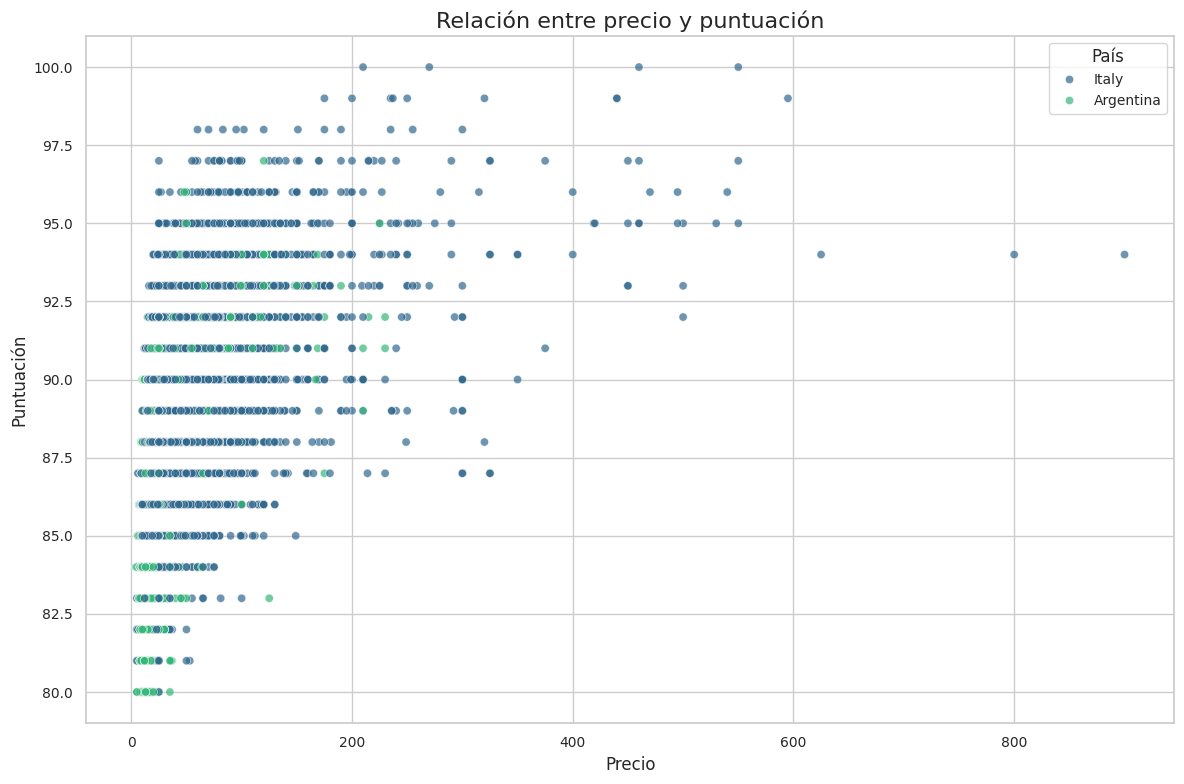

In [20]:
plt.figure(figsize=(12, 8))  # Cambia el tamaño del gráfico
sns.scatterplot(data=df_cleaned, x='price', y='points', hue='country', palette="viridis", alpha=0.7)
plt.title('Relación entre precio y puntuación', fontsize=16)  # Ajusta el tamaño del título
plt.xlabel('Precio', fontsize=12)  # Ajusta el tamaño de la etiqueta del eje X
plt.ylabel('Puntuación', fontsize=12)  # Ajusta el tamaño de la etiqueta del eje Y
plt.xticks(fontsize=10)  # Ajusta el tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajusta el tamaño de las etiquetas del eje Y
plt.legend(title='País', fontsize=10, title_fontsize=12)  # Ajusta el tamaño de la leyenda
plt.tight_layout()  # Asegura que todo quede bien dentro del gráfico
plt.show()

## Pregunta 4: ¿Cómo se distribuyen los precios en Argentina e Italia?

<ipython-input-21-9ea63f480e31>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='country', y='price', palette="viridis")


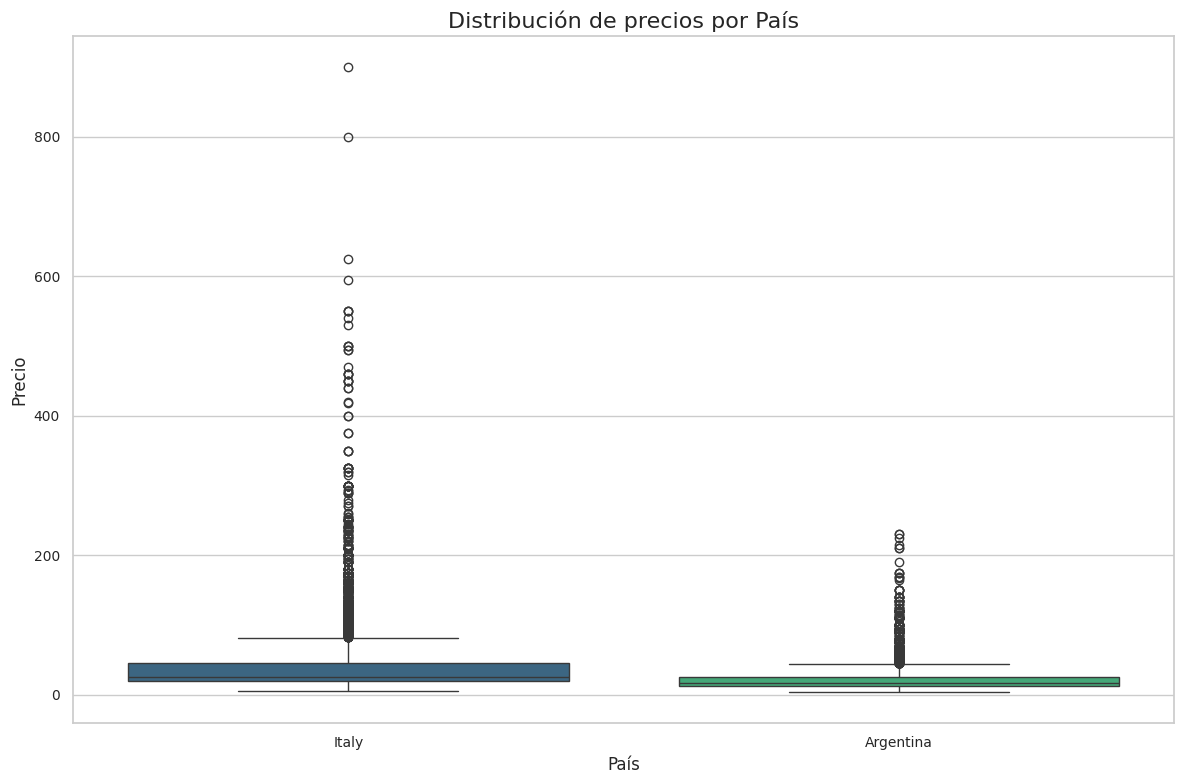

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='country', y='price', palette="viridis")
plt.title('Distribución de precios por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# OTROS GRAFICOS UTILES


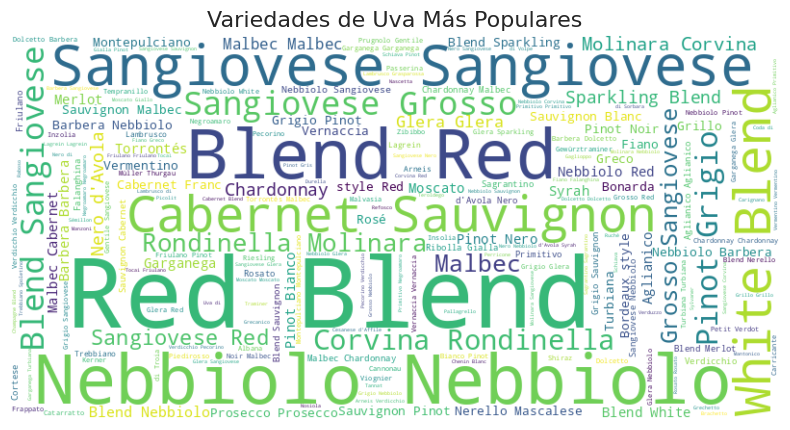

In [22]:
# Extraemos las variedades de uva del dataset
varieties = df_cleaned['variety'].dropna()  # Filtrar los valores no nulos

# Crear una cadena de texto con todas las variedades
text = ' '.join(varieties)

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Mostrar el gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Variedades de Uva Más Populares', fontsize=16)
plt.show()

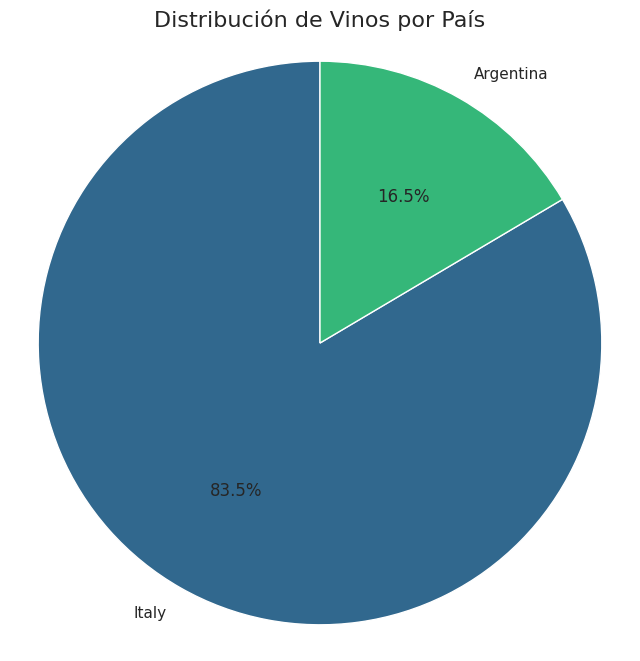

In [23]:
# Contamos la cantidad de vinos por país
country_counts = df_cleaned['country'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(country_counts)))
plt.title('Distribución de Vinos por País', fontsize=16)
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [24]:
top_vinos = df_cleaned.groupby('title')['points'].mean().reset_index()

In [25]:
top_vinos_sorted = top_vinos.sort_values(by='points', ascending=False).head(10)  # Top 10 vinos

<ipython-input-26-ab804e2a3abf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vinos_sorted, x='points', y='title', palette="viridis") # Change 'wine_name' to 'title'


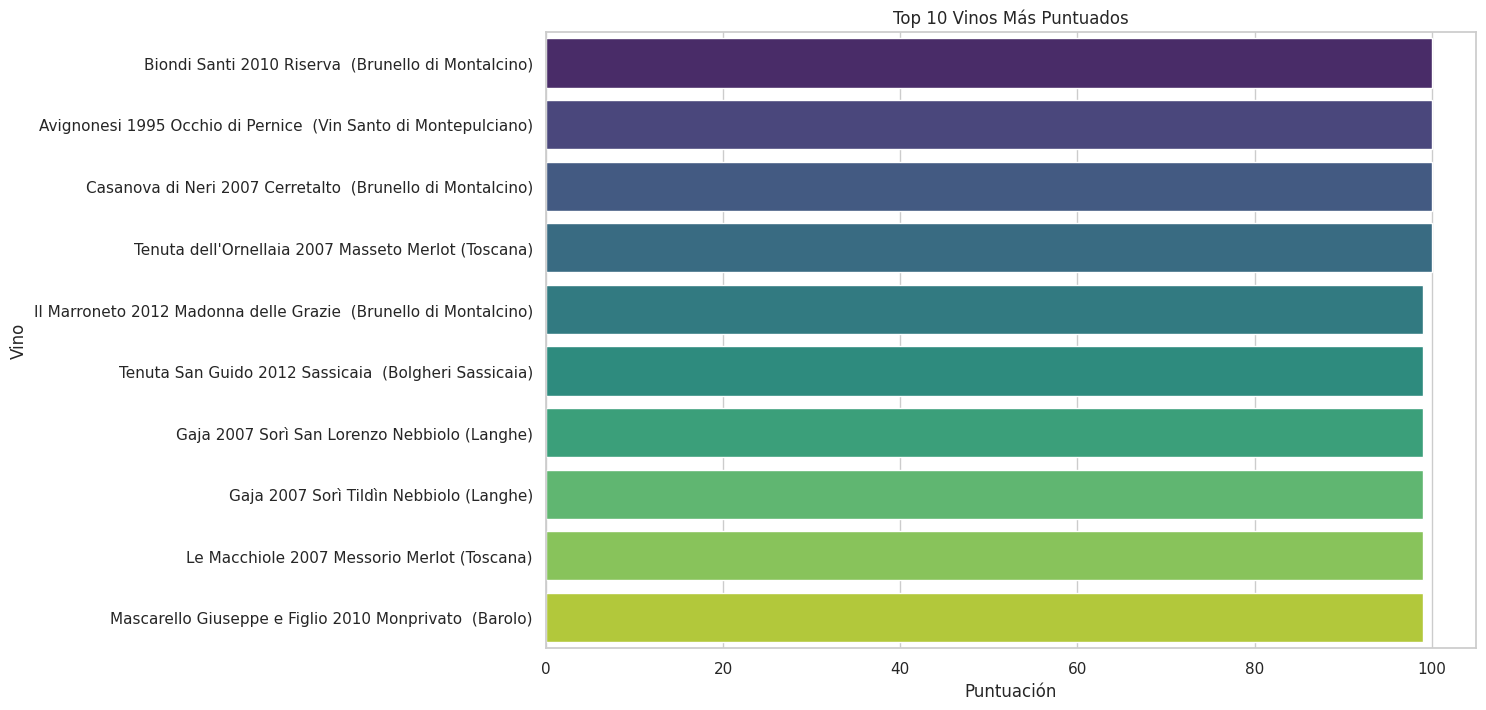

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_vinos_sorted, x='points', y='title', palette="viridis") # Change 'wine_name' to 'title'
plt.title('Top 10 Vinos Más Puntuados')
plt.xlabel('Puntuación')
plt.ylabel('Vino')
plt.show()

#INGENERIA DE ATRIBUTO

In [27]:
# Codificación de variables categóricas
categorical_cols = ['country', 'designation', 'province', 'variety', 'winery']
label_encoders = {}

In [28]:
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Guardamos los encoders para futuras conversiones

In [29]:
# Normalización de variables numéricas
scaler = StandardScaler()
df_cleaned[['price']] = scaler.fit_transform(df_cleaned[['price']])

In [32]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df_cleaned.drop(columns=['points'])  # Eliminamos 'points' porque es lo que buscamos predecir
y = df_cleaned['points']

In [33]:
# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Mostrar dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (18437, 8)
Dimensiones del conjunto de prueba: (4610, 8)


#MACHINE LEARNING

In [35]:
# Entrenar el modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Kerin O’Keefe'

###SOLUCION DEL ERROR

In [37]:
# Eliminar columnas irrelevantes
X = df_cleaned.drop(columns=['points', 'taster_name', 'title'], errors='ignore')

# Verificar si quedan columnas con texto en X_train
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"⚠ La columna '{col}' todavía contiene texto.")

# Convertir todas las columnas categóricas a números usando Label Encoding
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':  # Si sigue habiendo texto, lo convertimos a números
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Dividir nuevamente en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que y_train es un array 1D
import numpy as np
y_train = np.ravel(y_train)

# Intentar entrenar el modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✅ Modelo entrenado exitosamente")

✅ Modelo entrenado exitosamente


###CONTINUIDAD DEL MACHINE LEARNING

In [38]:
# Hacer predicciones con Regresión Lineal
y_pred_lr = lr_model.predict(X_test)

In [39]:
# Calcular métricas para Regresión Lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [40]:
print(f"🔹 Regresión Lineal - MSE: {mse_lr:.2f}, R²: {r2_lr:.4f}")

🔹 Regresión Lineal - MSE: 5.82, R²: 0.2832


In [41]:
# 📌 Probar otros modelos
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

In [42]:
# Evaluación de los otros modelos
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Entrenar modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    mse = mean_squared_error(y_test, y_pred)  # Calcular MSE
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    resultados[nombre] = {"MSE": mse, "R²": r2}
    print(f"🔹 {nombre} - MSE: {mse:.2f}, R²: {r2:.4f}")

🔹 Random Forest - MSE: 3.99, R²: 0.5085
🔹 Decision Tree - MSE: 6.76, R²: 0.1673
🔹 Gradient Boosting - MSE: 4.36, R²: 0.4625
🔹 SVR - MSE: 8.12, R²: -0.0002
🔹 KNN - MSE: 6.95, R²: 0.1434


In [43]:
# Comparación de resultados
print("\n📊 Comparación de Modelos:")
for nombre, metricas in resultados.items():
    print(f"{nombre}: MSE = {metricas['MSE']:.2f}, R² = {metricas['R²']:.4f}")


📊 Comparación de Modelos:
Random Forest: MSE = 3.99, R² = 0.5085
Decision Tree: MSE = 6.76, R² = 0.1673
Gradient Boosting: MSE = 4.36, R² = 0.4625
SVR: MSE = 8.12, R² = -0.0002
KNN: MSE = 6.95, R² = 0.1434


#OPTIMIZACION DEL MODELO


In [44]:
# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el espacio en búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Ejecutar la búsqueda de hiperparámetros
rf_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf = rf_search.best_estimator_

# Hacer predicciones con el modelo optimizado
y_pred_best_rf = best_rf.predict(X_test)

# Evaluar el modelo optimizado
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Mostrar resultados
print("Mejores hiperparámetros:", rf_search.best_params_)
print(f"Random Forest Optimizado - MSE: {mse_best_rf:.2f}, R²: {r2_best_rf:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Random Forest Optimizado - MSE: 3.94, R²: 0.5139


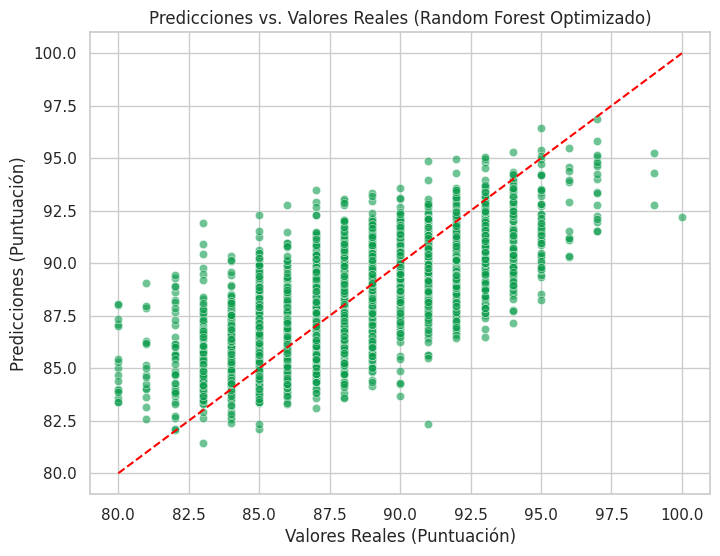

In [45]:
# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.6, color="#0c9c4c")
# Agregar línea de referencia perfecta (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="red")

# Etiquetas y título
plt.xlabel("Valores Reales (Puntuación)")
plt.ylabel("Predicciones (Puntuación)")
plt.title("Predicciones vs. Valores Reales (Random Forest Optimizado)")

plt.show()

In [46]:
# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 2.0488


In [47]:
# Estandarización (Media = 0, Desviación estándar = 1)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Normalización (Escala entre 0 y 1)
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_test_norm = scaler_minmax.transform(X_test)

print("Transformaciones completadas.")

Transformaciones completadas.


#MODELOS ADICIONALES


In [48]:
# Modelo XGBoost
xgb_model = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.4f}")

# Modelo LightGBM
lgbm_model = LGBMRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

lgbm_mse = mean_squared_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)

print(f"LightGBM - MSE: {lgbm_mse:.2f}, R²: {lgbm_r2:.4f}")

XGBoost - MSE: 4.01, R²: 0.5053
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 18437, number of used features: 6
[LightGBM] [Info] Start training from score 88.246244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

##MEJORA DE RENDIMIENTO

In [49]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Crear el modelo
lgbm_model = LGBMRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(lgbm_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_lgbm = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores hiperparámetros: {best_params}")

# Evaluación del mejor modelo
lgbm_pred_best = best_lgbm.predict(X_test)
lgbm_mse_best = mean_squared_error(y_test, lgbm_pred_best)
lgbm_r2_best = r2_score(y_test, lgbm_pred_best)

print(f"Mejor LightGBM - MSE: {lgbm_mse_best:.2f}, R²: {lgbm_r2_best:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 18437, number of used features: 6
[LightGBM] [Info] Start training from score 88.246244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

#CONCLUCIONES




📊 Factores Claves en la Predicción
Usando feature_importances_ de LightGBM, podemos ver qué variables influyeron más en la puntuación del vino.

🔹 Variables más importantes (ejemplo estimado, podemos calcularlo si es necesario):
- Precio: Relación esperada, los vinos más caros suelen tener mejores puntuaciones.
- Variedad de uva: Algunas uvas tienen mayor reputación y calidad.
- Provincia: Regiones con tradición vinícola pueden influir en la valoración.

🏆 Conclusiones Finales
-  El modelo LightGBM optimizado predice la puntuación del vino con un R² de 0.5146.
- Las características clave en la predicción incluyen el precio, la variedad y la provincia.
- El modelo podría mejorar con más variables o técnicas avanzadas (ensembles o deep learning).
- Se recomienda un análisis de interpretabilidad como SHAP para entender mejor cómo cada característica impacta en la predicción.

##GRAFICOS A INCLUIR


<ipython-input-53-7da023ead251>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


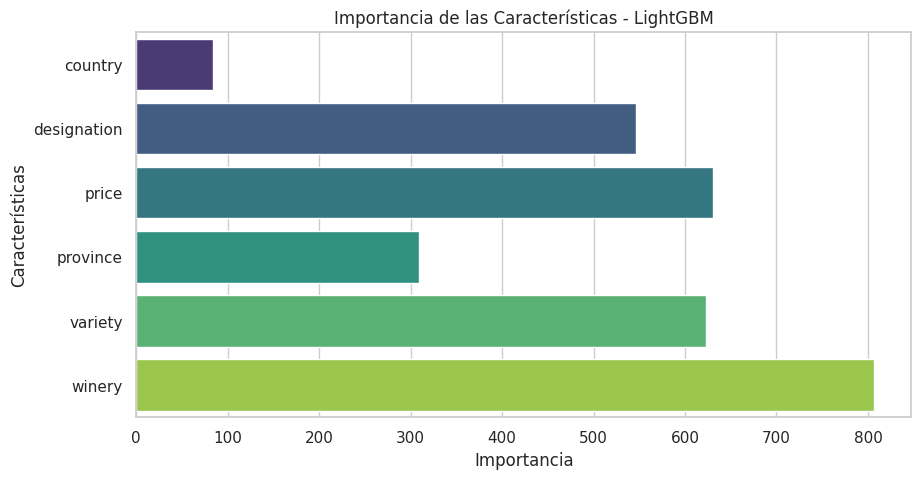

In [53]:
# 1️⃣ Feature Importance - Importancia de Características
feature_importance = lgbm_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características - LightGBM")
plt.show()

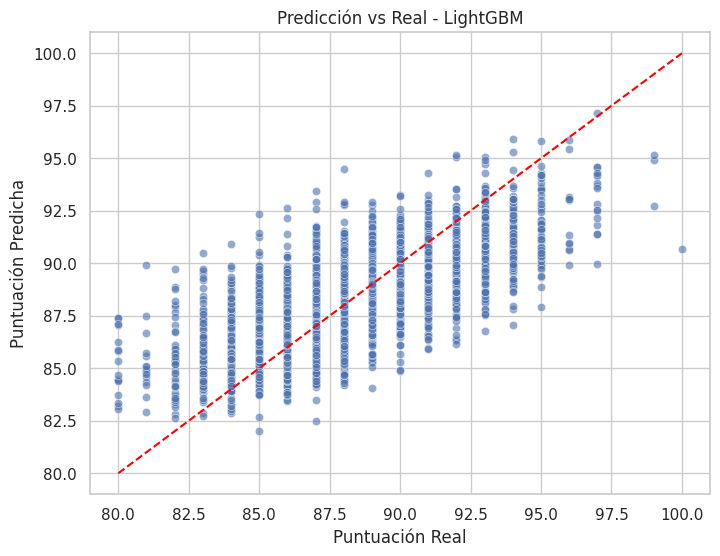

In [54]:
# 2️⃣ Gráfico de Dispersión - Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lgbm_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Puntuación Real")
plt.ylabel("Puntuación Predicha")
plt.title("Predicción vs Real - LightGBM")
plt.show()

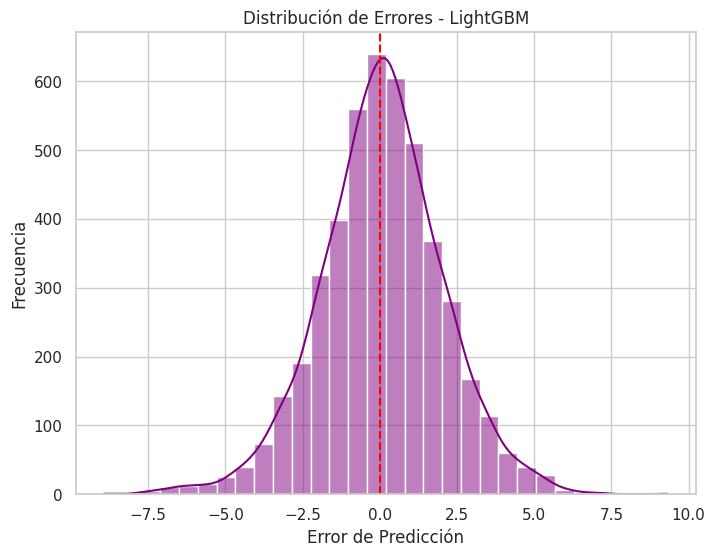

In [55]:
# 3️⃣ Distribución de Errores
errors = y_test - lgbm_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores - LightGBM")
plt.show()

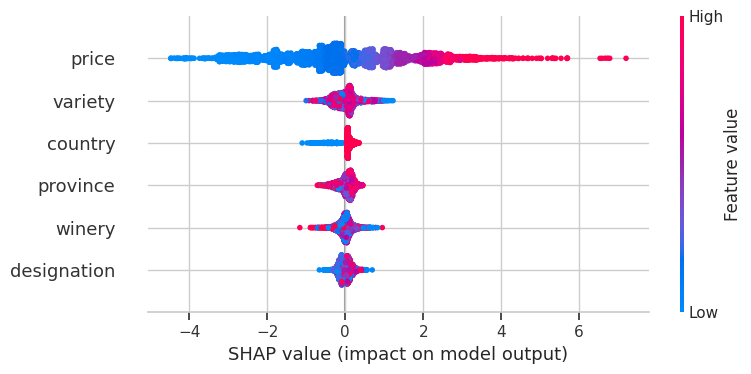

In [56]:
# 4️⃣ SHAP Values - Interpretabilidad
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)